1. Correlation  
   1.1 Positive correlation  
   1.2 Negative correlation  
   1.3 No / Weak correlation  
   1.4 Plotting more than two correlation plots (heatmap) 
   

[StatisticalModelling ](#Statistical-Modelling)

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import datasets,linear_model

import statsmodels.api as sm

In [3]:
from mpl_toolkits.mplot3d import Axes3D

<span style="color:blue;font-weight:bold"> Correlation  </span>
             
Correlation is used to test if two attributes have any relationship among themselves. Correlation coefficient is a term that is usually used to show the strength of correlation between these two variables.

+1 : Positively correlated (directly related, increase in one causes increase in other) <br>
-1 : Negatively correlated (Indirectly related, increase in one leads to decrease in other)  <br>
0 : No correlation coefficient values nearer to +1 or -1 indicate stronger correlation  <br>

<span style="color:blue;font-weight:bold">  Positive Correlation  </span>

A perfectly positive correlation means that 100% of the time, the variables in question move together by the exact same percentage and direction. A positive correlation can be seen between the demand for a product and the product's associated price. In situations where the avaiable supply stays the same, the price will rise if demand increases.

Correlation between x and y is 0.94


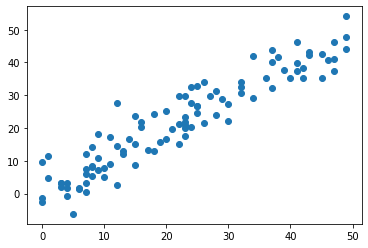

Each value in y is MORE THAN each value in x, where i is any number between [0,5]


In [4]:
np.random.seed(1)
pc_df = pd.DataFrame()

pc_df['x'] = np.random.randint(0,50,100)

pc_df['y'] = pc_df['x'] + np.random.normal(0,5,100)

corr = pc_df['x'].corr(pc_df['y'])

corr

print(f"Correlation between x and y is {round(corr,2)}")

plt.scatter(pc_df['x'],pc_df['y'])
plt.show()
print('Each value in y is MORE THAN each value in x, where i is any number between [0,5]')

<hr style="color:tomato;border:2px solid yellow" >

<span style="color:blue;font-weight:bold">  Negative Correlation  </span>

A perfect negative correlation means the relationship that exists between two variables is negative 100% of the time.Negative correlation is a key concept in portfolio construction, as it enables the creation of diversified portfolios that can better withstand portfolio volatility and smooth out returns. Correlation between two variables can vary widely over time. Stocks generally have negative correlation.

Correlation between x and y :-0.92


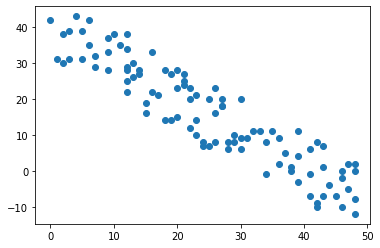

In [5]:
nc_df = pd.DataFrame()
nc_df['x'] = np.random.randint(0,50,100)
nc_df['y'] = 50 - nc_df['x'] - np.random.randint(0,20,100)
corr = nc_df['x'].corr(nc_df['y'])
print(f"Correlation between x and y :{round(corr,2)}")
plt.scatter(nc_df['x'],nc_df['y'])
plt.show()

<span style="color:blue;font-weight:bold"> No/weak Correlation </span>

A weak correlation means that as one variable increases or decreases, there is a lower likelihood of there being a relationship with the second variable.

<pre>
Recall from our last tutorial about Hypothesis testing, in the case of correlation test,

         Null Hypothesis or H0, holds that there is no correlation between attributes being tested
         True Hypothesis or H1, holds that there is a strong correlation between these two attributes
A p-value lesser than the pre-set alpha value violates the H0, thereby making H1 true.

For calculating correlation there are two largely popular tests.

Pearson Correlation test:

                    covariance of x and y
  r =  ------------------------------------------------------
          standard deviation of x * standard deviation of y
Spearman's Correlation test:

                      covariance of rank(x) and rank(y)
  p  (rho)=  ------------------------------------------------------
          standard deviation of rank(x) * standard deviation of rank(y)
          
</pre>          

In [6]:
wk_df = pd.DataFrame()
wk_df['x'] = np.random.randint(0,50,100)
wk_df['y'] = np.random.normal(0,50,100)

In [7]:
corr = wk_df['x'].corr(wk_df['y'] )
corr

0.06734655542869916

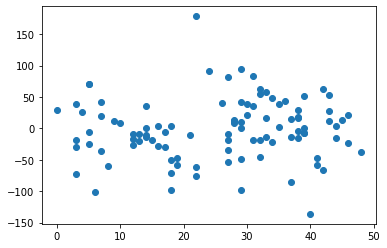

In [8]:
plt.scatter(wk_df['x'],wk_df['y'])
plt.show()

In [9]:
wine_quality = pd.read_csv(r'..\datasets\winequality-red.csv')

In [10]:
wine_quality.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


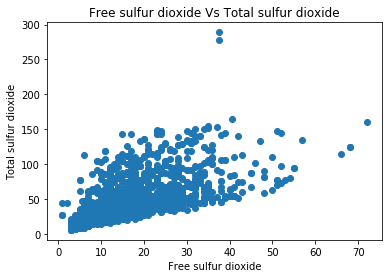

In [11]:
x = wine_quality['free sulfur dioxide']
y = wine_quality['total sulfur dioxide']
plt.title("Free sulfur dioxide Vs Total sulfur dioxide")
plt.xlabel("Free sulfur dioxide")
plt.ylabel("Total sulfur dioxide")
plt.scatter(x,y)
plt.show()

By default Pearson's coefficient of correlation is used while using correlation(.corr()) function

In [12]:
wine_quality['free sulfur dioxide'].corr(wine_quality['density'])

-0.021945831163490047

Using the correlation method as "spearman"

In [13]:
wine_quality['free sulfur dioxide'].corr(wine_quality['density'],method='spearman')

-0.04117767995273563

Both the coefficient methods show that there is a negative correlation among two features stated.

In [14]:
corr = wine_quality.corr()

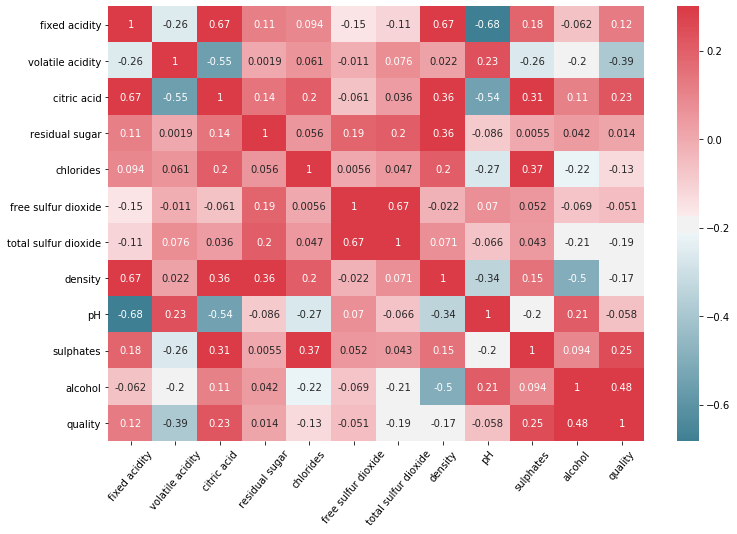

In [15]:
plt.figure(figsize=(12,8))
# cmap = sns.diverging_palette()
cmap = sns.diverging_palette(220,10,as_cmap=True,)
sns.heatmap(corr,annot=True,cmap=cmap,vmax=0.3)
    
plt.xticks(rotation=50)
plt.show()

By default, corr() gives pearsons correlation coefficient <br>
To calculate spearman coefficient use <span style="font-weight:bold">'method=spearman'</span>

In [16]:
# help(wine_quality.corr)

In [17]:
pearson_corr = wine_quality['free sulfur dioxide'].corr(wine_quality['density'])
spearman_corr = wine_quality['free sulfur dioxide'].corr(wine_quality['density'], method='spearman')

print(f"pearson_corr {pearson_corr}")
print(f"spearman_corr {spearman_corr}")

pearson_corr -0.021945831163490047
spearman_corr -0.04117767995273563


* Correlated VS Uncorrelated
* Homoscedasticity and Heteroscedasticity
* Highleverage and Influential observations

In [18]:
from sklearn.linear_model import LinearRegression

In [19]:
#Lets generate some data to depict correlated and uncorrelated plots
np.random.seed(42)
x =  np.arange(20)
y_corr = [2*xx+np.random.randint(1) for xx in x]
y_uncorr = np.sin(x)

In [20]:
x_reshaped = x.reshape(-1,1)

In [21]:
lr_corr = LinearRegression()
lr_corr.fit(x_reshaped,y_corr)
y_corr_pred = lr_corr.predict(x_reshaped)

In [22]:
lr_uncorr = LinearRegression()
lr_uncorr.fit(x_reshaped,y_uncorr)
y_uncorr_pred = lr_uncorr.predict(x_reshaped)

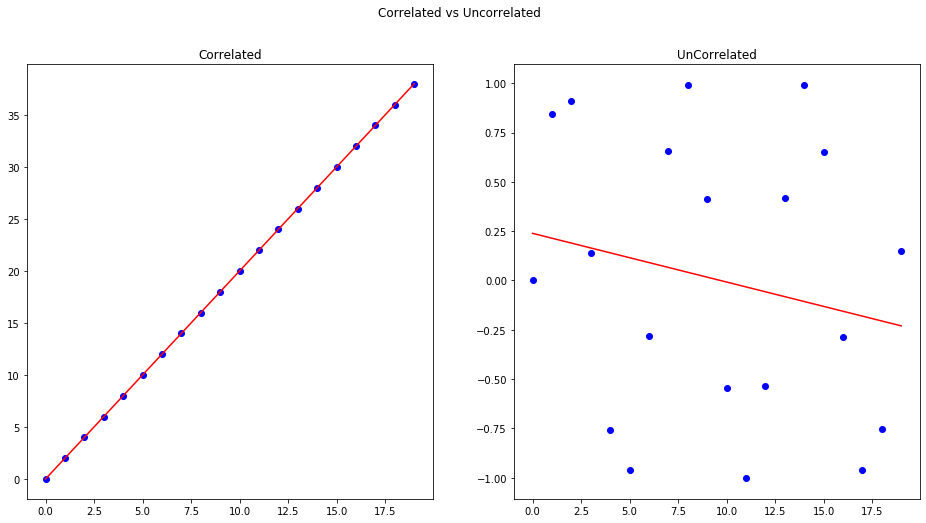

In [23]:
fig,(axs1,axs2) = plt.subplots(1,2,sharex=False,sharey=False,figsize=(16,8))
fig.suptitle("Correlated vs Uncorrelated")
axs1.set_title("Correlated")
axs1.scatter(x,y_corr,color="blue")
axs1.plot(x,y_corr_pred,color="red")

axs2.set_title("UnCorrelated")
axs2.scatter(x,y_uncorr,color="blue")
axs2.plot(x,y_uncorr_pred,color="red")
plt.show()

In [24]:
y_corr_residual = y_corr - y_corr_pred
y_uncorr_residual = y_uncorr - y_uncorr_pred

In [25]:
#Correlated Residual plots
y_corr_reshaped = np.array(y_corr).reshape(-1,1)
y_corr_residual_reshaped = np.array(y_corr_residual).reshape(-1,1)

lr_residual_corr = LinearRegression()
lr_residual_corr.fit(y_corr_reshaped,y_corr_residual)
y_corr_residual_pred = lr_residual_corr.predict(y_corr_reshaped)

# #Uncorrelated Residual plots

y_uncorr_reshaped = np.array(y_uncorr).reshape(-1,1)
y_uncorr_residual_reshaped = np.array(y_uncorr_residual).reshape(-1,1)

lr_residual_uncorr = LinearRegression()
lr_residual_uncorr.fit(y_uncorr_reshaped,y_uncorr_residual)
y_uncorr_residual_pred = lr_residual_uncorr.predict(y_uncorr_reshaped)

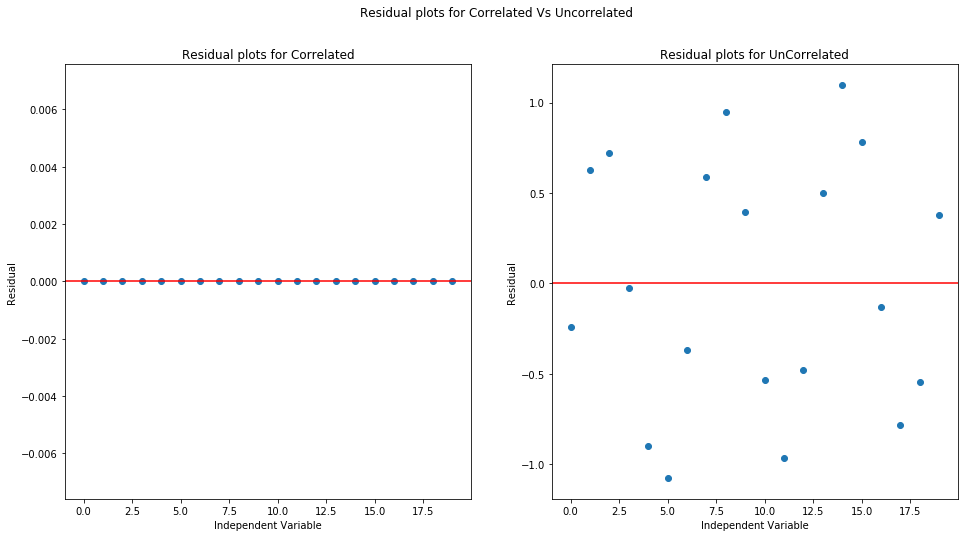

In [26]:
fig,(axs1,axs2) = plt.subplots(1,2,sharex=False,sharey=False,figsize=(16,8))
fig.suptitle("Residual plots for Correlated Vs Uncorrelated")
axs1.set_title("Residual plots for Correlated")
axs1.set_xlabel("Independent Variable")
axs1.set_ylabel("Residual")
axs1.scatter(x,y_corr_residual)
axs1.axhline(y=0,color='red')
# axs1.plot(y_corr,y_corr_residual_pred,color="red")

axs2.set_title("Residual plots for UnCorrelated")
axs2.set_xlabel("Independent Variable")
axs2.set_ylabel("Residual")
axs2.scatter(x,y_uncorr_residual)
# axs2.scatter(y_uncorr,y_uncorr_residual)
axs2.axhline(y=0,color='red')
# axs2.plot(y_uncorr,y_uncorr_residual_pred,color="red")
plt.show()

### Homoscedasticity and Heteroscedasticity

* Homoscedasticity :- It describes a situation in which the error term(i.e the "noise" or random distributions in the relationship between independent variables and the dependent variable) is the same across all values of the independent variables.

* Heteroscedasticity :- It is present when the size of the error term differs across values of an independent variable

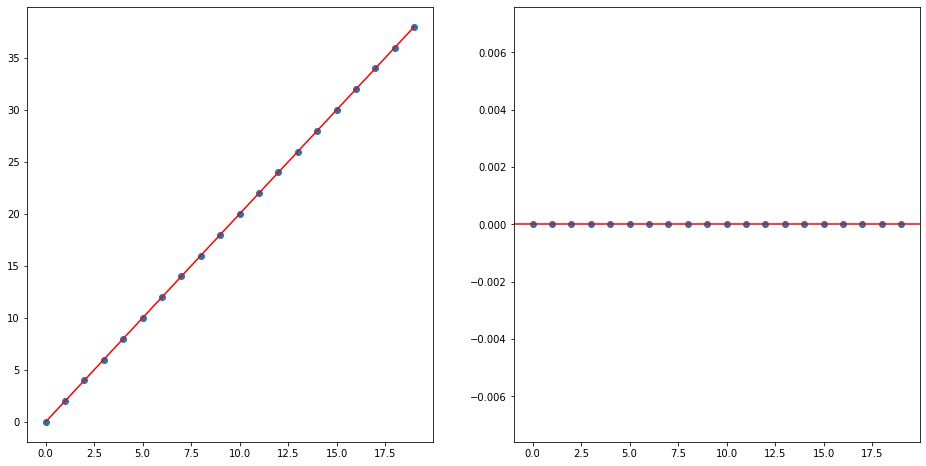

In [27]:
np.random.seed(42)
x = np.arange(20)
x_reshaped = x.reshape(-1,1)
y_home = [xx*2+np.random.randint(1)*2 for xx in range(20)] # y = 2x+c

lr_home = LinearRegression()
lr_home.fit(x_reshaped,y_home)
y_home_pred = lr_home.predict(x_reshaped)
y_home_residual = y_home-y_home_pred

fig,(axs1,axs2) = plt.subplots(1,2,sharex=False,sharey=False,figsize=(16,8))
# print(y_home_pred)
axs1.scatter(x_reshaped,y_home)
axs1.plot(x,y_home_pred,color='red')

axs2.scatter(x_reshaped,y_home_residual)
axs2.axhline(y=0,color='red')
plt.show()

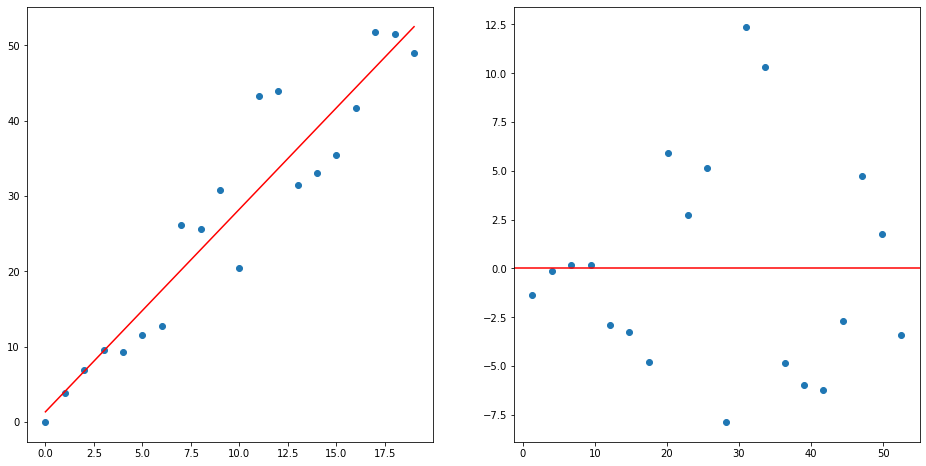

In [28]:
# y_hetero = [xx**2+(np.random.randint(1)*x) for xx in x]
y_hetero = [xh*2 +np.random.rand(1)*xh*2 for xh in x] # y = 2x+cx^2
# y_hetero = [xh*2 +np.random.rand(1)*2*xh for xh in range(20)]


lr_hetero = LinearRegression()
lr_hetero.fit(x_reshaped,y_hetero)
y_hetero_pred = lr_hetero.predict(x_reshaped)
y_hetero_residual = y_hetero - y_hetero_pred
fig,(ax1,ax2) = plt.subplots(1,2,sharex=False,sharey=False,figsize=(16,8))
ax1.scatter(x,y_hetero)
ax1.plot(x,y_hetero_pred,color='red')

ax2.scatter(y_hetero_pred,y_hetero_residual)
ax2.axhline(y=0,color='red')
plt.show()

In [29]:
# To overcome heteroscedasticity we are doing log transform here
y_hetero_log = np.log10(np.array(y_hetero) + 1e1)
x_reshape_log = np.log10(np.array(x_reshaped) + 1e1)


In [30]:
linear_hetero_log = LinearRegression()
linear_hetero_log.fit(x_reshaped, y_hetero_log)
pred_log_hetero = linear_hetero_log.predict(x_reshaped)

In [31]:
y_hetero_log_residual = y_hetero_log - pred_log_hetero

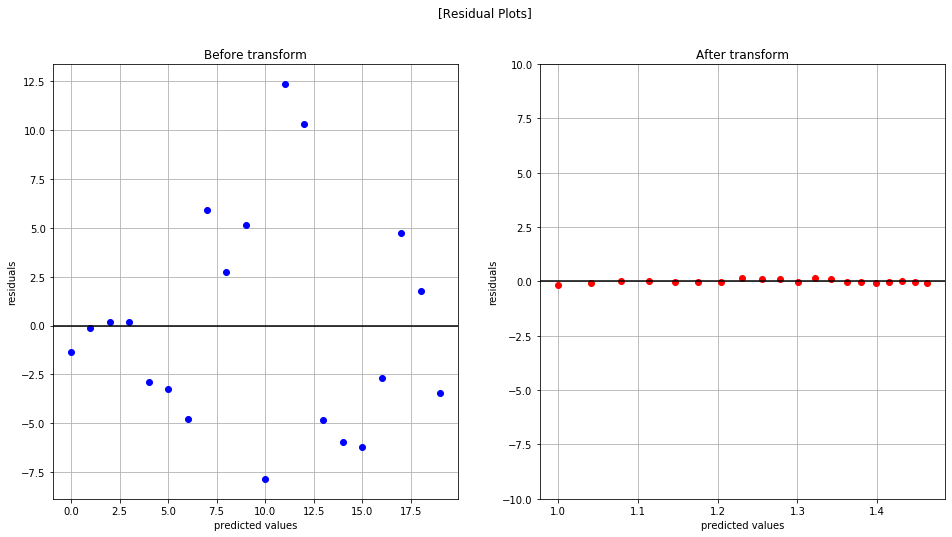

In [32]:
# Plotting the residuals
fig,axes = plt.subplots(1,2, sharex=False, sharey=False, figsize=(16,8))
fig.suptitle('[Residual Plots]')


axes[0].plot(x,y_hetero_residual,'bo')
axes[0].axhline(y=0, color='k')
axes[0].grid()
axes[0].set_title('Before transform')
axes[0].set_xlabel('predicted values')
axes[0].set_ylabel('residuals')

axes[1].set_ylim(-10,10)
axes[1].plot(x_reshape_log,y_hetero_log_residual,'ro')
axes[1].axhline(y=0, color='k')
axes[1].grid()
axes[1].set_title('After transform')
axes[1].set_xlabel('predicted values')
axes[1].set_ylabel('residuals')
plt.show()

Before , moving on to Leverage point let us first understand the difference between Outlier and leverage point.

* Outliers : An outlier is a measurement that does not fit in the pattern exhibited by the rest of the data.

* High-Leverage : High-leverage points have a large potential to affect the results of an anlysis if they correspond to observations that do not follow the linear model, but the resulting problem may not be evident in examination of residuals. It is therefore important to identify high-leverage points.

In [33]:
np.random.seed(42)
x = np.arange(20)
y = [xx*2+np.random.randint(4) for xx in range(20)]

y_linear_leverage = np.copy(y)
y_linear_leverage[18] = np.array([55])
y_linear_leverage[19] = np.array([58])

In [34]:
y_linear_leverage

array([ 2,  5,  4,  8, 10, 13, 12, 14, 18, 19, 22, 24, 26, 28, 31, 30, 35,
       37, 55, 58])

In [35]:
x_reshape = x.reshape(-1,1)

In [36]:
no_leverage = LinearRegression()
no_leverage.fit(x_reshape,y)
no_leverage_pred = no_leverage.predict(x_reshape)

ValueError: illegal value in 4-th argument of internal None

In [37]:
# fit model with leverage data
linear_leverage = LinearRegression()
linear_leverage.fit(x_reshape,y_linear_leverage)
pred_leverage = linear_leverage.predict(x_reshape)

NameError: name 'no_leverage_pred' is not defined

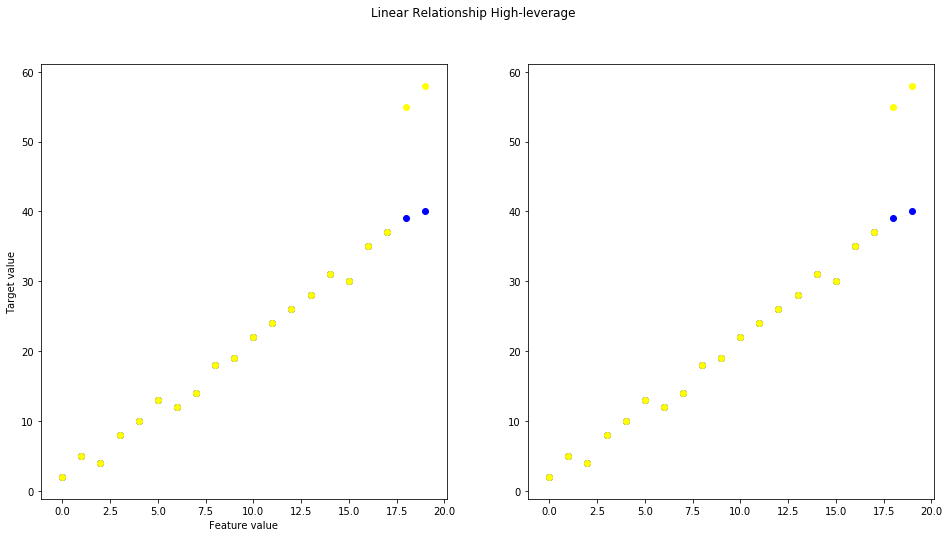

In [38]:
# Plot outputs
fig,(ax1,ax2) = plt.subplots(1,2, sharex=False, sharey=False,figsize=(16,8))
fig.suptitle('Linear Relationship High-leverage')
ax1.scatter(x_reshape,y,color='blue')
ax1.scatter(x_reshape,y_linear_leverage,color='yellow')
ax1.set_xlabel('Feature value',fontdict=None, labelpad=None)
ax1.set_ylabel('Target value', fontdict=None, labelpad=None)

ax2.scatter(x_reshape,y,color='blue')
ax2.scatter(x_reshape,y_linear_leverage,color='yellow')
ax2.plot(x_reshape, no_leverage_pred, color='red',linewidth=3)
ax2.plot(x_reshape,pred_leverage,color='green',linewidth=3)
ax2.set_ylim(0,60)
ax2.set_xlim(-1.0,21.5)
plt.xticks(())
plt.yticks(())
ax2.set_xlabel('Feature value',fontdict=None, labelpad=None)
ax2.set_ylabel('Target value',fontdict=None, labelpad=None)

plt.show()

In [ ]:
# Plotting the residuals
fig,axes = plt.subplots(1,2,sharex=False,sharey=False,figsize=(16,8))
fig.suptitle('[Residual Plots]')
axes[0].set_ylim(-20,20)
axes[0].plot(x, no_leverage_pred - y,'bo')
axes[0].axhline(y=0,color='k')
axes[0].grid()
axes[0].set_title('NoLeverage')
axes[0].set_xlabel('Predicted values')
axes[0].set_ylabel('residuals')

axes[1].set_ylim(-20,20)
axes[1].plot(x,y_linear_leverage-pred_leverage, 'ro')
axes[1].axhline(y=0,color='k')
axes[1].grid()
axes[1].set_title('Leverage')
axes[1].set_xlabel('Predicted values')
axes[1].set_ylabel('residuals')
plt.show()

### Non-Linear relationship

In [39]:
x = np.arange(20)
x_reshape = x.reshape(-1,1)
y = [x*2+np.random.randint(4) for x in range(20)]
lr_model = LinearRegression()
lr_model.fit(x_reshape,y)
y_pred = lr_model.predict(x_reshape)

In [40]:
y_non_linear = [x**3+np.random.randint(1)*4 for x in range(20)]
non_lr_model = LinearRegression()
non_lr_model.fit(x_reshape,y_non_linear)
y_non_linear_pred = non_lr_model.predict(x_reshape)

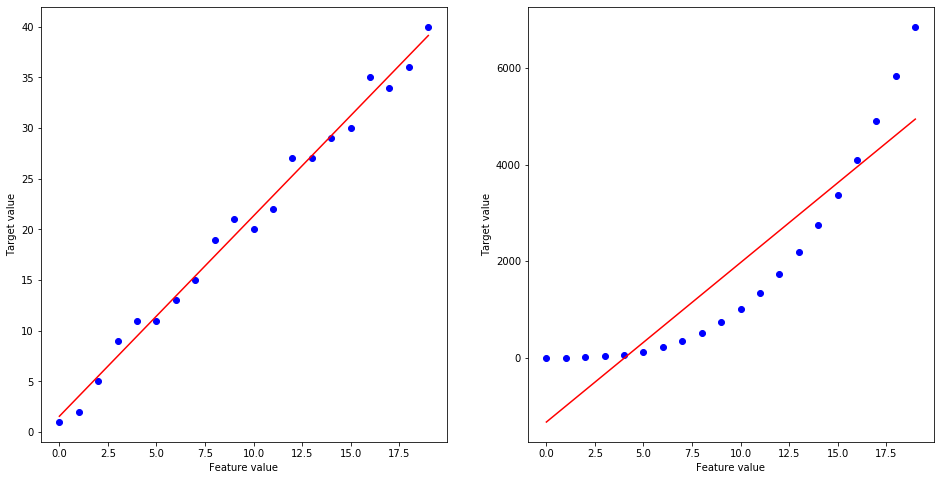

In [41]:
fix,(axs1,axs2) = plt.subplots(1,2,sharex=False,sharey=False,figsize=(16,8))
axs1.plot(x_reshape,y,'bo')
axs1.plot(x_reshape,y_pred,color='red')
axs1.set_xlabel('Feature value',fontdict=None, labelpad=None)
axs1.set_ylabel('Target value', fontdict=None, labelpad=None)

axs2.plot(x_reshape,y_non_linear,'bo')
axs2.plot(x_reshape,y_non_linear_pred,color='red')
axs2.set_xlabel('Feature value',fontdict=None, labelpad=None)
axs2.set_ylabel('Target value', fontdict=None, labelpad=None)
plt.show()

Text(0, 0.5, 'residuals')

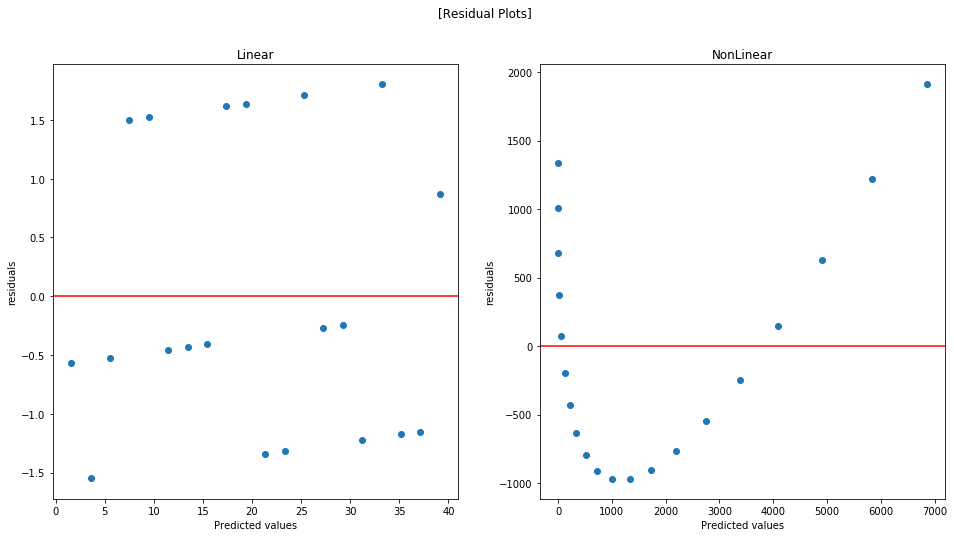

In [42]:
#Residual plots
fig,(axs1,axs2) = plt.subplots(1,2,sharex=False,sharey=False,figsize=(16,8))
fig.suptitle('[Residual Plots]')
axs1.scatter(y_pred,y-y_pred)
axs1.axhline(y=0,color='red')
axs1.set_title('Linear')
axs1.set_xlabel('Predicted values')
axs1.set_ylabel('residuals')

axs2.scatter(y_non_linear,y_non_linear-y_non_linear_pred)
axs2.axhline(y=0,color='red')
axs2.set_title('NonLinear')
axs2.set_xlabel('Predicted values')
axs2.set_ylabel('residuals')

In [43]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline

In [44]:
# help(LinearRegression)
# help(PolynomialFeatures)

In [45]:
#Transformation
poly = Pipeline([('poly',PolynomialFeatures(degree=3)),('linear',LinearRegression(fit_intercept=False))])
poly.fit(x_reshape,y_non_linear)

Pipeline(memory=None,
         steps=[('poly',
                 PolynomialFeatures(degree=3, include_bias=True,
                                    interaction_only=False, order='C')),
                ('linear',
                 LinearRegression(copy_X=True, fit_intercept=False, n_jobs=None,
                                  normalize=False))],
         verbose=False)

In [46]:
poly3 = poly.predict(x_reshape)

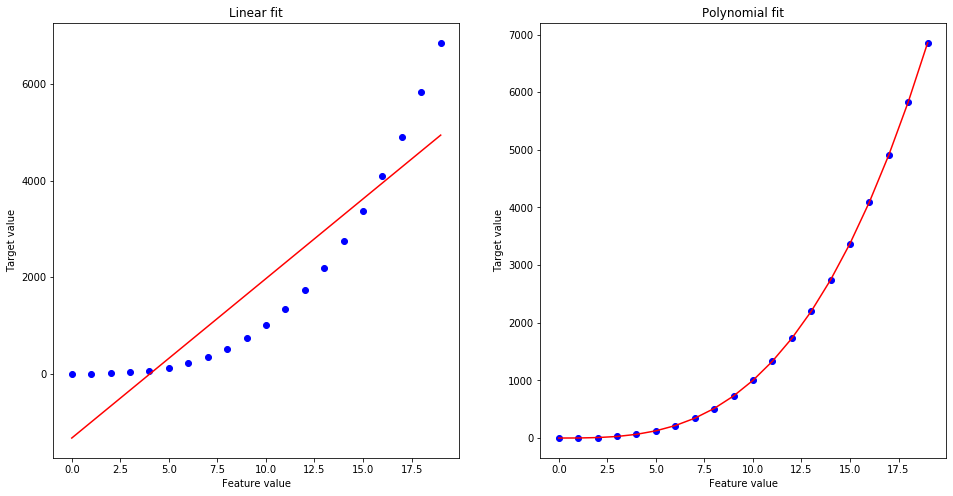

In [47]:
fig,(axs1,axs2) = plt.subplots(1,2,sharex=False,sharey=False,figsize=(16,8))
axs1.plot(x_reshape,y_non_linear,'bo')
axs1.plot(x_reshape,y_non_linear_pred,color='red')
axs1.set_title('Linear fit')
axs1.set_xlabel('Feature value',fontdict=None, labelpad=None)
axs1.set_ylabel('Target value', fontdict=None, labelpad=None)


axs2.plot(x_reshape,y_non_linear,'bo')
axs2.plot(x_reshape,poly3,color='red')
axs2.set_title('Polynomial fit')
axs2.set_xlabel('Feature value',fontdict=None, labelpad=None)
axs2.set_ylabel('Target value', fontdict=None, labelpad=None)
plt.show()

### Note: Doubt check how come the graph showing all zero, after polynomialfit, if axs2.set_ylim(-10,10) code is set

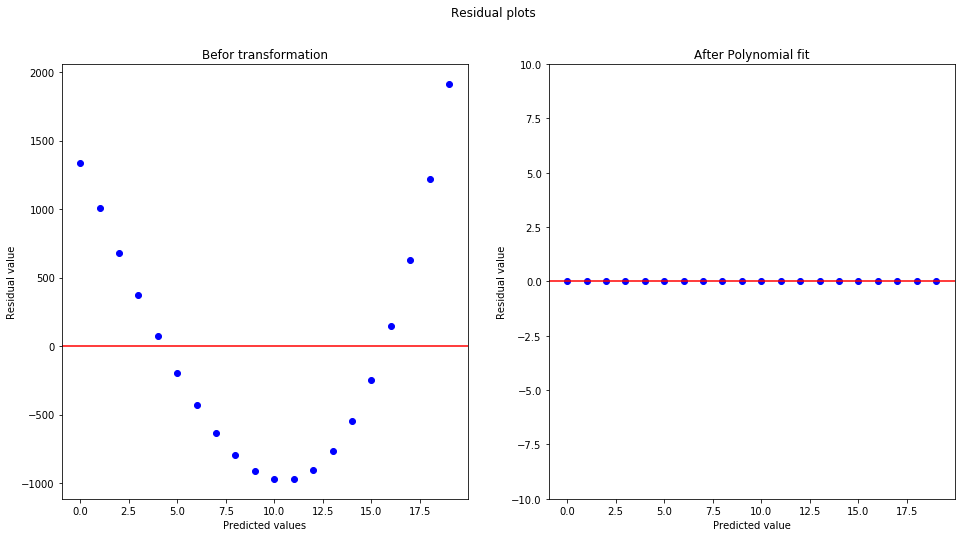

In [48]:
fig,(axs1,axs2) = plt.subplots(1,2,sharex=False,sharey=False,figsize=(16,8))
fig.suptitle('Residual plots')
axs1.plot(x_reshape,y_non_linear-y_non_linear_pred,'bo')
axs1.axhline(y=0,color='red')
# axs1.plot(x_reshape,y_non_linear_pred,color='red')
axs1.set_title('Befor transformation')
axs1.set_xlabel('Predicted values',fontdict=None, labelpad=None)
axs1.set_ylabel('Residual value', fontdict=None, labelpad=None)


axs2.set_ylim(-10,10)
axs2.plot(x_reshape,y_non_linear-poly3,'bo')
# axs2.plot(x_reshape,poly3,color='red')
axs2.axhline(y=0,color='red')
axs2.set_title('After Polynomial fit')
axs2.set_xlabel('Predicted value',fontdict=None, labelpad=None)
axs2.set_ylabel('Residual value', fontdict=None, labelpad=None)
plt.show()

### Outliers

In [49]:
np.random.seed(20)
x = np.arange(20)
y = [xx*2+np.random.randint(1)*4 for xx in range(20)]
y_val = [xval*2+np.random.randint(1)*4 for xval in range(20)]

y_outlier = y.copy()
y_outlier[18]=80

In [50]:
x_reshape = x.reshape(-1,1)
y = np.array(y).reshape(-1,1)
lr = LinearRegression()
lr.fit(x_reshape,y)
y_pred = lr.predict(x_reshape)

lr_outlier = LinearRegression()
lr_outlier.fit(x_reshape,y_outlier)
y_outlier_pred = lr_outlier.predict(x_reshape)

print(f"Coefficient is {lr.coef_[0][0]} \nAnd its intercept is {lr.intercept_[0]}")
print(f"Coefficient is {lr_outlier.coef_[0]} \nAnd its intercept is {lr_outlier.intercept_}")

ValueError: illegal value in 4-th argument of internal None

NameError: name 'y_outlier_pred' is not defined

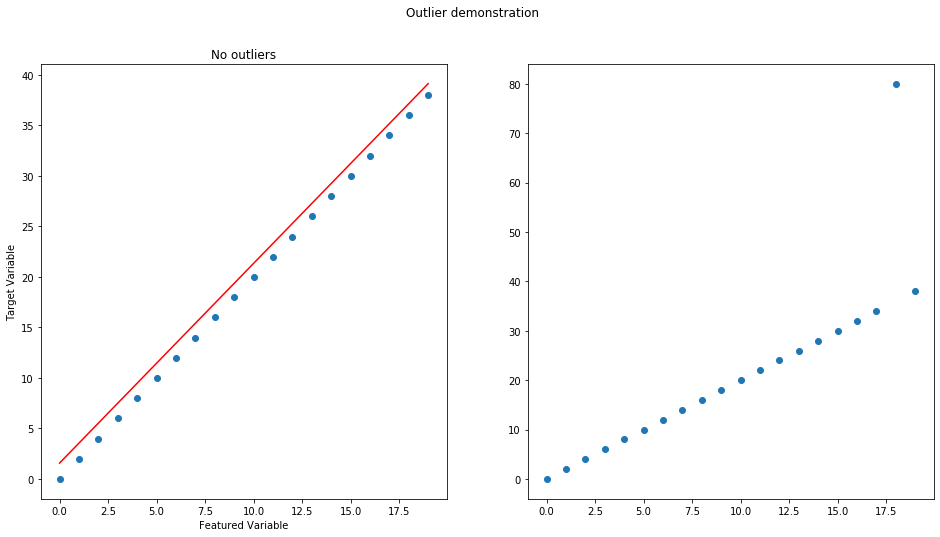

In [51]:
fig,axes = plt.subplots(1,2,sharex=False,sharey=False,figsize=(16,8))
fig.suptitle('Outlier demonstration')
axes[0].scatter(x,y)
axes[0].plot(x,y_pred,color='red')
axes[0].set_title('No outliers')
axes[0].set_xlabel('Featured Variable')
axes[0].set_ylabel('Target Variable')

axes[1].scatter(x,y_outlier)
axes[1].plot(x,y_outlier_pred,color='red')
axes[1].set_title('With outliers')
axes[1].set_xlabel('Featured Variable')
axes[1].set_ylabel('Target Variable')

plt.show()

In [ ]:
fig,axes = plt.subplots(1,2,sharex=False,sharey=False,figsize=(16,8))
fig.suptitle('Residual Plots')
axes[0].scatter(x_reshape,y-y_pred)
# axes[0].scatter(y_pred,y-y_pred)
axes[0].axhline(y=0,color='red')
axes[0].set_title('No outliers')
axes[0].set_xlabel('Target Variable')
axes[0].set_ylabel('Residual')


axes[1].scatter(x_reshape,y_outlier-y_outlier_pred)
# axes[1].scatter(y_outlier,y_outlier-y_outlier_pred)
axes[1].axhline(y=0,color='red')
axes[1].set_title('With outliers')
axes[1].set_xlabel('Target Variable')
axes[1].set_ylabel('Residual')
axes[1].set_ylim(-5,5)
plt.show()

In [52]:
#Transform the data by removing outliers
mean = np.mean(y_outlier,axis=0)
std = np.std(y_outlier, axis=0)

y_outlier_transform = [yval for yval in y_outlier if( (yval > mean-2*std) & (yval < mean+2*std))]
print(len(y_outlier_transform))

19


In [53]:
x = np.arange(19).reshape(-1,1)

In [54]:
lr_outlier_transform = LinearRegression()
lr_outlier_transform.fit(x,y_outlier_transform)
y_outlier_pred_transoform = lr_outlier_transform.predict(x)

print(f"Coefficient is {lr.coef_[0][0]} \nAnd its intercept is {lr.intercept_[0]}")
print(f"Coefficient is {lr_outlier_transform.coef_[0]} \nAnd its intercept is {lr_outlier_transform.intercept_}")

AttributeError: 'LinearRegression' object has no attribute 'coef_'

NameError: name 'y_outlier_pred' is not defined

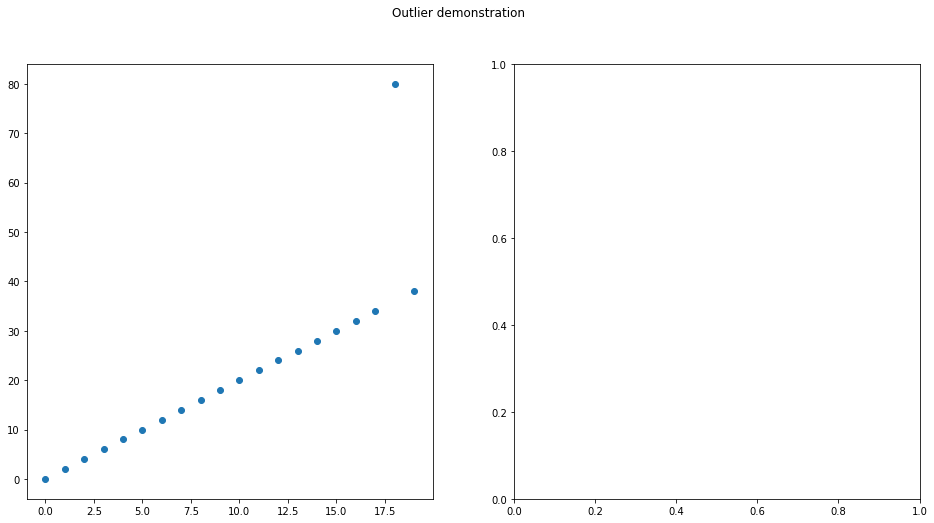

In [55]:
fig,axes = plt.subplots(1,2,sharex=False,sharey=False,figsize=(16,8))
fig.suptitle('Outlier demonstration')
axes[0].scatter(x_reshape,y_outlier)
axes[0].plot(x_reshape,y_outlier_pred,color='red')
axes[0].set_title('Before Transform')
axes[0].set_xlabel('Featured Variable')
axes[0].set_ylabel('Target Variable')

axes[1].scatter(x,y_outlier_transform)
axes[1].plot(x,y_outlier_pred_transoform,color='red')
axes[1].set_title('After Transformation')
axes[1].set_xlabel('Featured Variable')
axes[1].set_ylabel('Target Variable')

plt.show()

In [ ]:
fig,axes = plt.subplots(1,2,sharex=False,sharey=False,figsize=(16,8))
fig.suptitle('Residual Plots')
axes[0].scatter(x_reshape,y_outlier-y_outlier_pred)
# axes[0].scatter(y_outlier,y_outlier-y_outlier_pred)
axes[0].axhline(y=0,color='red')
axes[0].set_title('Befor Transofrm')
axes[0].set_xlabel('Indpendent variable')
axes[0].set_ylabel('Residual')
axes[0].set_ylim(-5,5)


axes[1].scatter(x,y_outlier_transform-y_outlier_pred_transoform)
# axes[1].scatter(y_outlier,y_outlier-y_outlier_pred)
axes[1].axhline(y=0,color='red')
axes[1].set_title('After Transform')
axes[1].set_xlabel('Indpendent variable')
axes[1].set_ylabel('Residual')
axes[1].set_ylim(-5,5)
plt.show()

### Statistical-Modelling

In [ ]:
data = datasets.load_diabetes()
data

In [56]:
df = pd.DataFrame(data['data'],columns=data['feature_names'])
df

NameError: name 'data' is not defined

In [57]:
df['bmi'].describe()

NameError: name 'df' is not defined

In [58]:
x = df['bmi']
x = x.values.reshape(-1,1)
y = data['target']

print(x)
print(y)

NameError: name 'df' is not defined

\\[ Y = \beta_0 + \beta_1X \\]

\\[\beta_1 = \frac{\sum_{i=1}^{m} (x_i - \bar{x})(y_i - \bar{y})}{\sum_{i=1}^{m} (x_i - \bar{x})^2}\\]

\\[ \beta_0 = \bar{y} - \beta_1 \bar{x} \\]

To find the values 𝛽1 and 𝛽0 , we will need mean of X and Y. We will find these and the coefficients.

In [59]:
mean_x = np.mean(x)
mean_y = np.mean(y)
print(mean_x, mean_y)

9.0 19.0


In [60]:
numerator,denominator = 0,0

for i in range(len(x)):
    numerator += (x[i]-mean_x)*(y[i]-mean_y)
    denominator += (x[i]-mean_x)**2

beta1 = numerator/denominator
beta0 = mean_y - (beta1*mean_x)

print(beta0,beta1)

[1.] [2.]


\\[ RMSE  \\]

In [61]:
#rmse 
sse=0
for i in range(len(x)):    
    y_pred= beta0+beta1*x[i]
    sse += (y[i]-y_pred)**2
rmse = np.sqrt(sse/len(x))
print(f"Root mean squared error {round(rmse[0],2)}")

Root mean squared error 1.0


\\[Calculating   R^2 \\]

In [62]:
# Calculating R\\^2 

ss_t = 0
ss_e = 0
for i in range(len(x)):
    y_pred = beta0 + beta1 * x[i]
    ss_t += (y[i] - mean_y)** 2
    ss_e += (y[i]-y_pred)**2
r2 = 1 - (ss_e/ss_t)
print(f"R2 score : {round(r2[0],4)*100} ")

R2 score : 99.17 


Now we will find \\(R^2\\) score. \\(R^2\\) is defined as follows,

\\[SS_t = \sum_{i=1}^{m} (y_i - \bar{y})^2\\]

\\[SS_r = \sum_{i=1}^{m} (y_i - \hat{y_i})^2\\]

\\[R^2 \equiv 1 - \frac{SS_r}{SS_t}\\]

\\(SS_t\\) is the total sum of squares and \\(SS_r\\) is the total sum of squares of residuals.

\\(R^2\\) Score usually range from 0 to 1. It will also become negative if the model is completely wrong. Now we will find \\(R^2\\) Score.

### Using sklearn

In [63]:
lr = linear_model.LinearRegression()

In [64]:
from sklearn.metrics import r2_score

In [65]:
lr.fit(x,y)

ValueError: Found input variables with inconsistent numbers of samples: [19, 20]

In [66]:
y_pred = lr.predict(x)

NotFittedError: This LinearRegression instance is not fitted yet. Call 'fit' with appropriate arguments before using this method.

ValueError: x and y must be the same size

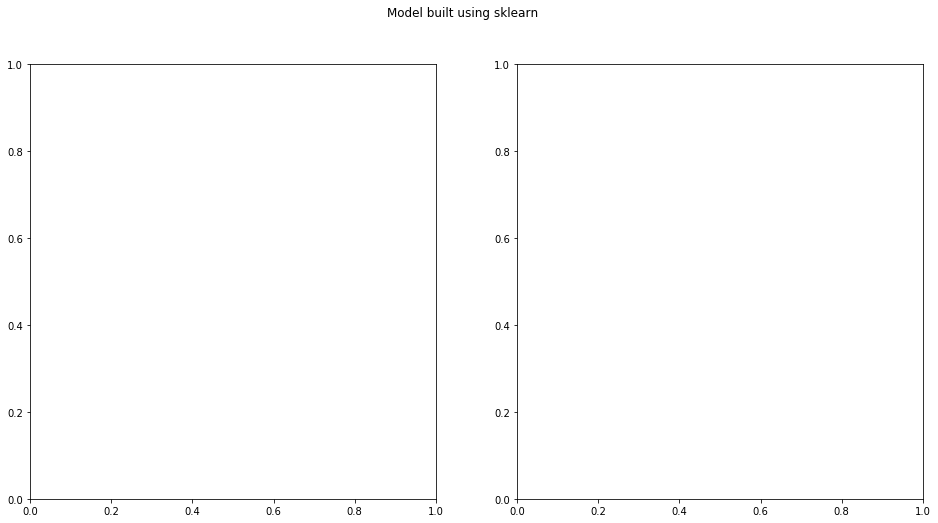

In [67]:
fig,axes = plt.subplots(1,2,sharex=False,sharey=False,figsize=(16,8))
fig.suptitle('Model built using sklearn')
axes[0].scatter(x,y)
axes[0].plot(x,y_pred,color='red')
axes[0].set_title('Diabetes Linear Regression')
axes[0].axvline(x=0,color='tomato')
axes[0].set_xlabel('bmi')
axes[0].set_ylabel('Diabetes')
axes[0].set_xlim(-0.09,0.1)
axes[0].grid()
# ax2.set_xlim(-1.0,21.5)

axes[1].scatter(x,y-y_pred)
axes[1].axhline(y=0,color='red')
axes[1].set_title('Residual plots')
axes[1].set_xlabel('bmi')
axes[1].set_ylabel('Residual')
axes[0].set_ylim(25,350)

plt.show()

In [ ]:
lr.coef_,lr.intercept_

In [68]:
y_est = lr.coef_[0]*(x) + lr.intercept_
y_est

AttributeError: 'LinearRegression' object has no attribute 'coef_'

In [69]:
y_est[1],y_pred[1]

NameError: name 'y_est' is not defined

In [70]:
# slopes = []
# for i1,i2 in zip(range(0,10),range(1,11)):
#     slope = (y_pred[i1]-y_pred[i2])/(x[i1]-x[i2])
#     slopes.append(slope)
# # (y_pred[0]-y_pred[1])/(x[0]-x[1])
# slopes

In [71]:
lr.coef_[0],lr.intercept_

AttributeError: 'LinearRegression' object has no attribute 'coef_'

In [72]:
help(sm.add_constant)

Help on function add_constant in module statsmodels.tools.tools:

add_constant(data, prepend=True, has_constant='skip')
    Adds a column of ones to an array
    
    Parameters
    ----------
    data : array-like
        ``data`` is the column-ordered design matrix
    prepend : bool
        If true, the constant is in the first column.  Else the constant is
        appended (last column).
    has_constant : str {'raise', 'add', 'skip'}
        Behavior if ``data`` already has a constant. The default will return
        data without adding another constant. If 'raise', will raise an
        error if a constant is present. Using 'add' will duplicate the
        constant, if one is present.
    
    Returns
    -------
    data : array, recarray or DataFrame
        The original values with a constant (column of ones) as the first or
        last column. Returned value depends on input type.
    
    Notes
    -----
    When the input is recarray or a pandas Series or DataFrame, the ad

In [73]:
x_sm = sm.add_constant(x)

In [74]:
ols = sm.OLS(y,x_sm).fit()

ValueError: endog and exog matrices are different sizes

In [75]:
y_pred_ols = ols.predict(x_sm)
y_pred_ols

NameError: name 'ols' is not defined

In [76]:
ols.summary()

NameError: name 'ols' is not defined

***Interpreting the Regression Results ***:-
Considering the important components within the result:-

Adjusted R-squared :- It reflects the fit of the model. R-squared range from 0 to 1, where a higher value generally indicates a better fit , assuming certain conditions are met.

const coefficient :- Is the y-intercept. It means that if the x1 coefficient is zero, then the expected output(Y) would be equal to the const coefficient.

x1 coefficient :- This represents the change in the output Y due to a change of one unit in the x1 rate.

std err :- It reflects the level of accuracy of the coefficients. The lower it is, the higher is the level of accuracy.

P > |t| :- 'P' represents the p-value. A p-value of less than 0.05 is considered to be statistically significant.

Confidence Interval :- It represents the range in which our coefficients are likely to fall(with a likelihood of 95%)


### Multiple Linear Regression

In [77]:
boston = pd.read_csv(r'../datasets/boston_house_price.csv')

In [78]:
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [79]:
corr = boston.corr()

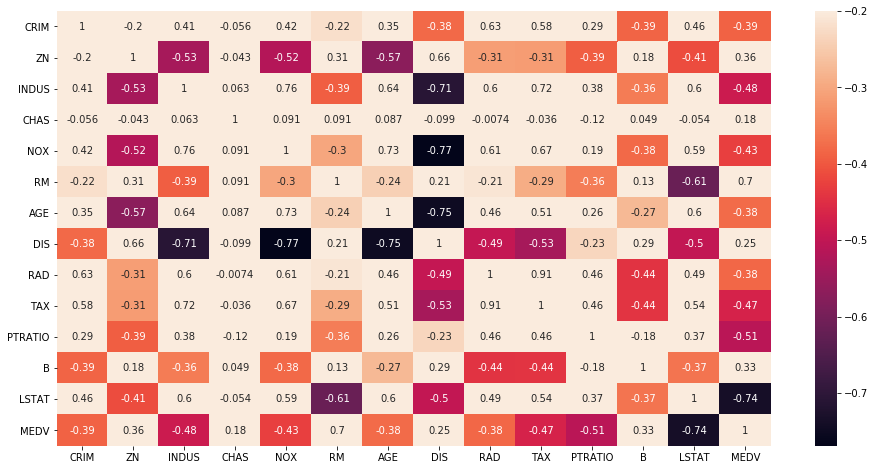

In [80]:
plt.figure(figsize=(16,8))
# val=0.9
sns.heatmap(corr,annot=True,vmax=-0.2)
plt.show()

In [81]:
x = boston[['RM','AGE']]
y = boston['MEDV']

In [82]:
x.shape[0]

506

In [83]:
np.ones(x.shape[0]).shape

(506,)

In [84]:
x['const'] = np.ones(x.shape[0])

C:\Users\ADMIN\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [85]:
xa = x.T

In [86]:
x.shape

(506, 3)

In [87]:
w = np.zeros((3,1))

In [88]:
y = np.array(y).reshape(1,-1)

In [89]:
def cost_function(x,w,y):
    m = len(y)
    print(w.T.shape[1])
    print(x.shape[0])
    y_pred = np.dot(w.T,x)
    print(y.shape)
    print(y_pred.shape)
    sse = np.sum((y-y_pred)**2)
    cost = -1/(2*m)*sse
    return cost

In [90]:
cost_function(xa,w,y)

3
3
(1, 506)
(1, 506)


-149813.16999999998

In [91]:
def gradient(x,w,y):
    h = np.dot(w.T,x)
    loss = h-y
    gd = np.sum(np.dot(loss,x.T))
#     gd = np.sum((np.dot(w.T,x)-y)*x,axis=1)
    print(gd)
    return gd

In [92]:
def gradient_descent(x,w,y,lr=0.001,iterations=1000):
    cost_history = [0]*iterations      
    for idx in range(iterations):
        gd = gradient(x,w,y)
        print(f"*****Gradient in descent {gd} \n********")
        w = w - lr*gd
        cost_history[idx] = cost_function(x,w,y)
    return w,cost_history                

In [93]:
# w.shape,x.shape

w,cost_history = gradient_descent(xa,w,y)

-817906.8175999998
*****Gradient in descent -817906.8175999998 
********
3
3
(1, 506)
(1, 506)
2704370802.5123453
*****Gradient in descent 2704370802.5123453 
********
3
3
(1, 506)
(1, 506)
-8941876116085.902
*****Gradient in descent -8941876116085.902 
********
3
3
(1, 506)
(1, 506)
2.9565896955087576e+16
*****Gradient in descent 2.9565896955087576e+16 
********
3
3
(1, 506)
(1, 506)
-9.77582613995655e+19
*****Gradient in descent -9.77582613995655e+19 
********
3
3
(1, 506)
(1, 506)
3.232331387200246e+23
*****Gradient in descent 3.232331387200246e+23 
********
3
3
(1, 506)
(1, 506)
-1.068755320225683e+27
*****Gradient in descent -1.068755320225683e+27 
********
3
3
(1, 506)
(1, 506)
3.5337896944411905e+30
*****Gradient in descent 3.5337896944411905e+30 
********
3
3
(1, 506)
(1, 506)
-1.1684311056249814e+34
*****Gradient in descent -1.1684311056249814e+34 
********
3
3
(1, 506)
(1, 506)
3.863363036967328e+37
*****Gradient in descent 3.863363036967328e+37 
********
3
3
(1, 506)
(1, 506

C:\Users\ADMIN\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: overflow encountered in square
  
C:\Users\ADMIN\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in subtract
  



nan
*****Gradient in descent nan 
********
3
3
(1, 506)
(1, 506)
nan
*****Gradient in descent nan 
********
3
3
(1, 506)
(1, 506)
nan
*****Gradient in descent nan 
********
3
3
(1, 506)
(1, 506)
nan
*****Gradient in descent nan 
********
3
3
(1, 506)
(1, 506)
nan
*****Gradient in descent nan 
********
3
3
(1, 506)
(1, 506)
nan
*****Gradient in descent nan 
********
3
3
(1, 506)
(1, 506)
nan
*****Gradient in descent nan 
********
3
3
(1, 506)
(1, 506)
nan
*****Gradient in descent nan 
********
3
3
(1, 506)
(1, 506)
nan
*****Gradient in descent nan 
********
3
3
(1, 506)
(1, 506)
nan
*****Gradient in descent nan 
********
3
3
(1, 506)
(1, 506)
nan
*****Gradient in descent nan 
********
3
3
(1, 506)
(1, 506)
nan
*****Gradient in descent nan 
********
3
3
(1, 506)
(1, 506)
nan
*****Gradient in descent nan 
********
3
3
(1, 506)
(1, 506)
nan
*****Gradient in descent nan 
********
3
3
(1, 506)
(1, 506)
nan
*****Gradient in descent nan 
********
3
3
(1, 506)
(1, 506)
nan
*****Gradient in des

(1, 506)
nan
*****Gradient in descent nan 
********
3
3
(1, 506)
(1, 506)
nan
*****Gradient in descent nan 
********
3
3
(1, 506)
(1, 506)
nan
*****Gradient in descent nan 
********
3
3
(1, 506)
(1, 506)
nan
*****Gradient in descent nan 
********
3
3
(1, 506)
(1, 506)
nan
*****Gradient in descent nan 
********
3
3
(1, 506)
(1, 506)
nan
*****Gradient in descent nan 
********
3
3
(1, 506)
(1, 506)
nan
*****Gradient in descent nan 
********
3
3
(1, 506)
(1, 506)
nan
*****Gradient in descent nan 
********
3
3
(1, 506)
(1, 506)
nan
*****Gradient in descent nan 
********
3
3
(1, 506)
(1, 506)
nan
*****Gradient in descent nan 
********
3
3
(1, 506)
(1, 506)
nan
*****Gradient in descent nan 
********
3
3
(1, 506)
(1, 506)
nan
*****Gradient in descent nan 
********
3
3
(1, 506)
(1, 506)
nan
*****Gradient in descent nan 
********
3
3
(1, 506)
(1, 506)
nan
*****Gradient in descent nan 
********
3
3
(1, 506)
(1, 506)
nan
*****Gradient in descent nan 
********
3
3
(1, 506)
(1, 506)
nan
*****Gradien

nan
*****Gradient in descent nan 
********
3
3
(1, 506)
(1, 506)
nan
*****Gradient in descent nan 
********
3
3
(1, 506)
(1, 506)
nan
*****Gradient in descent nan 
********
3
3
(1, 506)
(1, 506)
nan
*****Gradient in descent nan 
********
3
3
(1, 506)
(1, 506)
nan
*****Gradient in descent nan 
********
3
3
(1, 506)
(1, 506)
nan
*****Gradient in descent nan 
********
3
3
(1, 506)
(1, 506)
nan
*****Gradient in descent nan 
********
3
3
(1, 506)
(1, 506)
nan
*****Gradient in descent nan 
********
3
3
(1, 506)
(1, 506)
nan
*****Gradient in descent nan 
********
3
3
(1, 506)
(1, 506)
nan
*****Gradient in descent nan 
********
3
3
(1, 506)
(1, 506)
nan
*****Gradient in descent nan 
********
3
3
(1, 506)
(1, 506)
nan
*****Gradient in descent nan 
********
3
3
(1, 506)
(1, 506)
nan
*****Gradient in descent nan 
********
3
3
(1, 506)
(1, 506)
nan
*****Gradient in descent nan 
********
3
3
(1, 506)
(1, 506)
nan
*****Gradient in descent nan 
********
3
3
(1, 506)
(1, 506)
nan
*****Gradient in desc

nan
*****Gradient in descent nan 
********
3
3
(1, 506)
(1, 506)
nan
*****Gradient in descent nan 
********
3
3
(1, 506)
(1, 506)
nan
*****Gradient in descent nan 
********
3
3
(1, 506)
(1, 506)
nan
*****Gradient in descent nan 
********
3
3
(1, 506)
(1, 506)
nan
*****Gradient in descent nan 
********
3
3
(1, 506)
(1, 506)
nan
*****Gradient in descent nan 
********
3
3
(1, 506)
(1, 506)
nan
*****Gradient in descent nan 
********
3
3
(1, 506)
(1, 506)
nan
*****Gradient in descent nan 
********
3
3
(1, 506)
(1, 506)
nan
*****Gradient in descent nan 
********
3
3
(1, 506)
(1, 506)
nan
*****Gradient in descent nan 
********
3
3
(1, 506)
(1, 506)
nan
*****Gradient in descent nan 
********
3
3
(1, 506)
(1, 506)
nan
*****Gradient in descent nan 
********
3
3
(1, 506)
(1, 506)
nan
*****Gradient in descent nan 
********
3
3
(1, 506)
(1, 506)
nan
*****Gradient in descent nan 
********
3
3
(1, 506)
(1, 506)
nan
*****Gradient in descent nan 
********
3
3
(1, 506)
(1, 506)
nan
*****Gradient in desc

nan
*****Gradient in descent nan 
********
3
3
(1, 506)
(1, 506)
nan
*****Gradient in descent nan 
********
3
3
(1, 506)
(1, 506)
nan
*****Gradient in descent nan 
********
3
3
(1, 506)
(1, 506)
nan
*****Gradient in descent nan 
********
3
3
(1, 506)
(1, 506)
nan
*****Gradient in descent nan 
********
3
3
(1, 506)
(1, 506)
nan
*****Gradient in descent nan 
********
3
3
(1, 506)
(1, 506)
nan
*****Gradient in descent nan 
********
3
3
(1, 506)
(1, 506)
nan
*****Gradient in descent nan 
********
3
3
(1, 506)
(1, 506)
nan
*****Gradient in descent nan 
********
3
3
(1, 506)
(1, 506)
nan
*****Gradient in descent nan 
********
3
3
(1, 506)
(1, 506)
nan
*****Gradient in descent nan 
********
3
3
(1, 506)
(1, 506)
nan
*****Gradient in descent nan 
********
3
3
(1, 506)
(1, 506)
nan
*****Gradient in descent nan 
********
3
3
(1, 506)
(1, 506)
nan
*****Gradient in descent nan 
********
3
3
(1, 506)
(1, 506)
nan
*****Gradient in descent nan 
********
3
3
(1, 506)
(1, 506)
nan
*****Gradient in desc

In [94]:
cost_history


[-1105627322378.6467,
 -1.2087418638921183e+19,
 -1.3214732742985819e+26,
 -1.4447184025399822e+33,
 -1.579457793987956e+40,
 -1.726763443037308e+47,
 -1.8878073219554456e+54,
 -2.063870705161548e+61,
 -2.2563543631199854e+68,
 -2.466789706951187e+75,
 -2.696850972427127e+82,
 -2.9483685402880026e+89,
 -3.2233434988573146e+96,
 -3.5239635648163574e+103,
 -3.852620488804729e+110,
 -4.211929084326806e+117,
 -4.604748031359293e+124,
 -5.034202620174521e+131,
 -5.503709616330703e+138,
 -6.017004444656415e+145,
 -6.578170908506674e+152,
 -7.191673680738735e+159,
 -7.862393824907675e+166,
 -8.595667629290492e+173,
 -9.397329062704393e+180,
 -1.0273756189900274e+188,
 -1.1231921915814946e+195,
 -1.2279449462406277e+202,
 -1.3424673019448202e+209,
 -1.4676704051826786e+216,
 -1.6045503790882104e+223,
 -1.7541962486541156e+230,
 -1.9177986050776393e+237,
 -2.0966590781730393e+244,
 -2.292200692213692e+251,
 -2.5059791875955607e+258,
 -2.7396953983978023e+265,
 -2.995208784317116e+272,
 -3.27455

In [95]:
def cost_function(X,Y,W):
    m = len(Y)
    J = np.sum((X.dot(W) - Y) ** 2)/(2 * m)
    return J

In [96]:
initial_cost = cost_function(X,Y,W)
print(initial_cost)

NameError: name 'X' is not defined

**Hypothesis:  \\(h_\beta(x) = \beta^Tx\\)**

**Loss: \\((h_\beta(x)-y)\\)**

**Gradient: \\((h_\beta(x)-y)x_{j}\\)**

**Gradient Descent Updation: \\(\beta_j := \beta_j - \alpha(h_\beta(x)-y)x_{j})\\)**

In [97]:
def gradient_descent(X, Y, W, alpha, iterations):
    cost_history = [0] * iterations
    m = len(Y)
    
    for iteration in range(iterations):
        # Hypothesis values
        h = X.dot(W)
        # Difference between Hypothesis and Actual Y
        loss = h - Y
        # Gradient calculation
        gradient = X.T.dot(loss) / m
        # Changing values of W using Gradient
        W = W - alpha * gradient
        # New cost value
        cost = cost_function(X, Y, W)
        cost_history[iteration] = cost
    return W, cost_history

In [98]:
newW , cost_history = gradient_descent(X, Y, W, alpha, 100000)

NameError: name 'X' is not defined

**Hypothesis:  \\(h_\theta(x) = \beta^Tx\\)**


In [100]:
x = np.array([1,2,3,4,5,6,7,8,9,10])

In [101]:
y = np.array([1.24,5.23,7.24,7.60,9.97,14.31,13.99,14.88,18.04,20.70])

In [102]:
x = sm.add_constant(x)

In [105]:
lr = sm.OLS(y,x).fit()

In [106]:
lr.summary()

C:\Users\ADMIN\Anaconda3\lib\site-packages\scipy\stats\stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.971
Model:                            OLS   Adj. R-squared:                  0.967
Method:                 Least Squares   F-statistic:                     263.5
Date:                Sun, 11 Oct 2020   Prob (F-statistic):           2.09e-07
Time:                        18:11:12   Log-Likelihood:                -14.094
No. Observations:                  10   AIC:                             32.19
Df Residuals:                       8   BIC:                             32.79
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4360      0.756      0.576      0.580      -1.308       2.180
x1             1.9789      0.122     16.231      0.000       1.698       2.260
==============================================================================
Omnibus:                        0.706   Durbin-Watson:                   2.112
Prob(Omnibus):                  0.703   Jarque-Bera (JB):                0.517
Skew:                           0.468   Prob(JB):                        0.772
Kurtosis:                       2.398   Cond. No.                         13.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""